<a href="https://colab.research.google.com/github/ssselderey/SIAOD/blob/main/09_02_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фаза 2 • Неделя 9 • Компьютерное зрение

## Детекция объектов с помощью YOLO

In [1]:
# Если нужен GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Устанавливаем зависимости

In [2]:
!pwd

/content


In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [4]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

### 1. Простой инференс

Запускаем детекцию с помощью `detect.py` на изображениях, видео или прочих источниках. Результаты сохранятся в `runs`.
Пример:
 ```shell
python detect.py --source 0  # веб-камера
                          img.jpg  # картинка
                          vid.mp4  # видео
                          screen  # скриншот
                         'path/*.jpg'  # директория с картинками
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP потоковое видео
```

In [5]:
# При установке меняется домашняя директория.
# Была /content/ стала /content/yolov5
!pwd

/content/yolov5


In [ ]:
# создадим папку и загрузим туда пару изображений
!mkdir imgs
!wget -O imgs/image1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
!wget -O imgs/image2.jpg https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg

--2024-10-15 07:50:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922105 (900K) [image/jpeg]
Saving to: ‘imgs/image1.jpg’

imgs/image1.jpg     100%[===================>] 900.49K  --.-KB/s    in 0.03s   

2024-10-15 07:50:21 (25.2 MB/s) - ‘imgs/image1.jpg’ saved [922105/922105]

--2024-10-15 07:50:21--  https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg
Resolving www.rover.com (www.rover.com)... 104.17.219.168, 104.17.218.168, 104.17.221.168, ...
Connecting to www.rover.com (www.rover.com)|104.17.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104345 (102K) [image/jpeg]
Saving to: ‘imgs/image2.jpg’

imgs/image

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.5 --source /content/yolov5/imgs/

detect: weights=['yolov5s.pt'], source=/content/yolov5/imgs/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 274MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/imgs/image1.jpg: 416x640 1 cat, 31.8ms
image 2/2 /content/yolov5/imgs/image2.jpg: 384x640 1 cat, 47.6ms
Speed: 0.5ms pre-process, 39.7ms inference, 349.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/dete

In [ ]:
# !pwd

In [ ]:
# home directory = yolov5
path = 'runs/detect/exp'

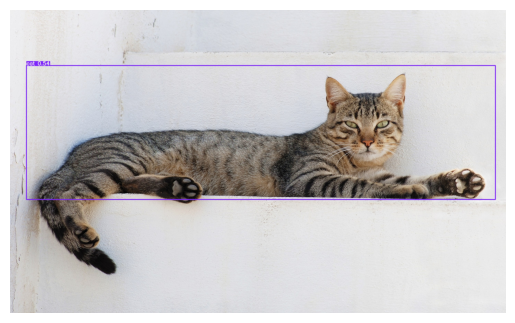

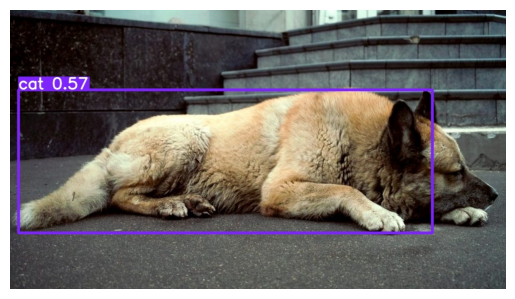

In [ ]:
for i in os.listdir(path):
    plt.imshow((read_image(os.path.join(path, i)).permute(1, 2, 0)))
    plt.axis('off')
    plt.show()

### 2. Обучение на своих данных.

 1. Размечаем датасет на roboflow и скачиваем его к себе.
 2. Запускаем обучение!

In [1]:
# https://universe.roboflow.com/cv-project-ggmi2/dog-breeds-ggciv/dataset/5/download
!pip install roboflow

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="LpBvn3sYqgJUrhG1yKv2")
project = rf.workspace("narana-van").project("my-first-project-49ipc")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 114.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-1 in yolov5pytorch:: 100%|██████████| 354/354 [00:00<00:00, 4991.37it/s]


In [6]:
!ls data

Argoverse.yaml	      hyps		 images		  VOC.yaml
coco128-seg.yaml      ImageNet1000.yaml  Objects365.yaml  xView.yaml
coco128.yaml	      ImageNet100.yaml	 scripts
coco.yaml	      ImageNet10.yaml	 SKU-110K.yaml
GlobalWheat2020.yaml  ImageNet.yaml	 VisDrone.yaml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
# Train!
!python train.py --img 640 --batch 16 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-28 11:53:44.852830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761652424.872255    3701 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761652424.878171    3701 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761652424.893235    3701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761652424.893269    3701 computation_placer.cc:177] computation placer already registere

In [8]:
!ls /content
!ls /content/yolov5


My-First-Project-1  sample_data  yolov5
benchmarks.py	 detect.py   __pycache__       runs	       val.py
CITATION.cff	 export.py   pyproject.toml    segment
classify	 hubconf.py  README.md	       train.py
CONTRIBUTING.md  LICENSE     README.zh-CN.md   tutorial.ipynb
data		 models      requirements.txt  utils


In [11]:
!ls /content/My-First-Project-1


data.yaml  README.dataset.txt  README.roboflow.txt  train


In [12]:
# создаём папки valid/images и valid/labels
!mkdir -p /content/My-First-Project-1/valid/images
!mkdir -p /content/My-First-Project-1/valid/labels

# копируем ~20% данных для валидации
!bash -c 'ls /content/My-First-Project-1/train/images | head -n 10 | xargs -I{} cp /content/My-First-Project-1/train/images/{} /content/My-First-Project-1/valid/images/'
!bash -c 'ls /content/My-First-Project-1/train/labels | head -n 10 | xargs -I{} cp /content/My-First-Project-1/train/labels/{} /content/My-First-Project-1/valid/labels/'


In [13]:
!cat /content/My-First-Project-1/data.yaml


names:
- objects
nc: 1
roboflow:
  license: CC BY 4.0
  project: my-first-project-49ipc
  url: https://universe.roboflow.com/narana-van/my-first-project-49ipc/dataset/1
  version: 1
  workspace: narana-van
test: ../test/images
train: My-First-Project-1/train/images
val: My-First-Project-1/valid/images


In [14]:
%%writefile /content/My-First-Project-1/data.yaml
train: /content/My-First-Project-1/train/images
val: /content/My-First-Project-1/valid/images

nc: 1
names: ['car']


Overwriting /content/My-First-Project-1/data.yaml


In [16]:
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data /content/My-First-Project-1/data.yaml --weights yolov5s.pt --cache


/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-28 12:05:22.536764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761653122.560040    6638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761653122.566024    6638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761653122.581921    6638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761653122.581957    6638 computation_placer.cc:177] computation placer a

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17639, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 17639 (delta 11), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17639/17639), 16.96 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (11987/11987), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.3 MB/s eta 0:00:00


In [20]:
!ls /content/yolov5/runs/train/exp2/weights/


best.pt  last.pt


In [21]:
!python /content/yolov5/detect.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/My-First-Project-1/train/images

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/My-First-Project-1/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/174 /content/My-First-Project-1/train/images/025e7d85100d97633f534d30562c67a9_jpg.rf.5e4aaaa13614e2499b145dab46b2036c.jpg: 640x640 (no detections), 11.4ms
image 2/174 /content/My-First-Project-1/train/images/025e7d85100d97633f534d30562c67a9_jpg.rf.baaa641fa220ab0a1c77

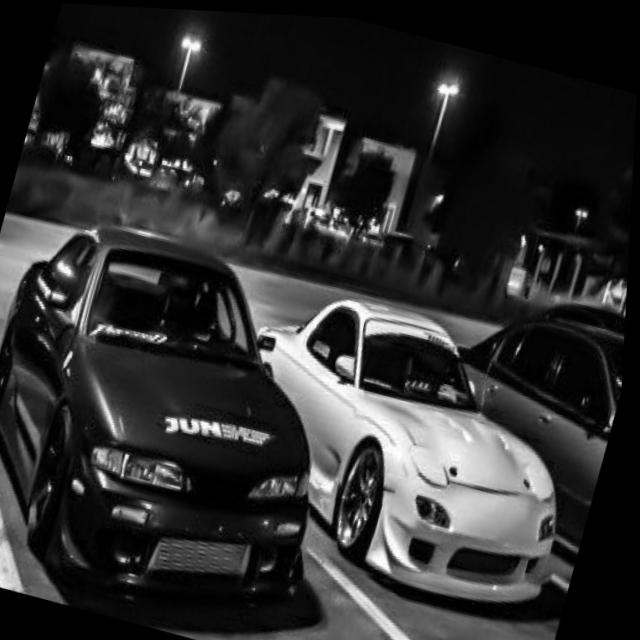

In [23]:
from IPython.display import Image, display
display(Image(filename='/content/yolov5/runs/detect/exp/025e7d85100d97633f534d30562c67a9_jpg.rf.5e4aaaa13614e2499b145dab46b2036c.jpg'))

In [33]:
!python /content/yolov5/detect.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg



detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg: 640x640 1 car, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 102.

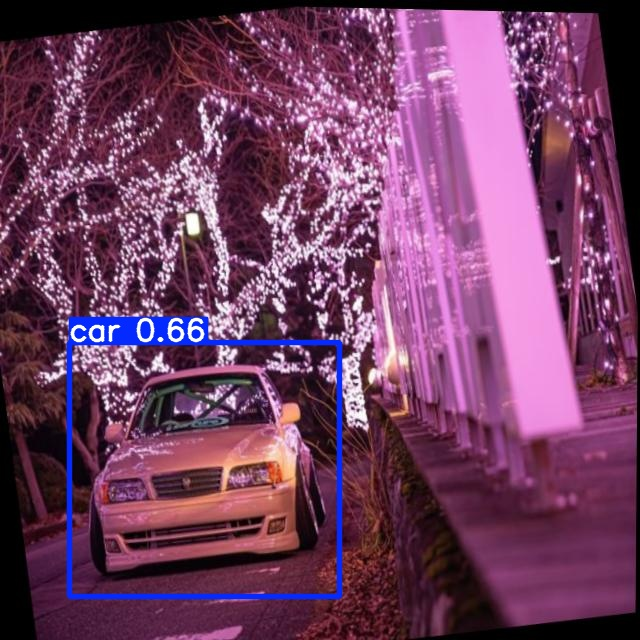

In [34]:
from IPython.display import Image, display
display(Image(filename='/content/yolov5/runs/detect/exp5/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg'))


1. По умолчанию результаты будут сохраняться в папку `yolov5/runs`, если нужно сохранять по другому пути, можно в ключи добавить путь к папку, куда хотим сохранять. Например, если подключен GoogleDrive:

    ```
    --name /content/drive/MyDrive/yolo_demo
    ```

    Тогда результаты будут сохраняться на GoogleDrive в папку `yolo_demo`. Создавать предварительно эту папку не нужно: скрипт сам создаст её.

2. Имея собственные веса можно **продолжить** обучение модели: нужно изменить аргумент `weights`:

    ```
    --weights /path/to/your/weights.pt
    ```

### Инференс собственной модели

In [ ]:
!pwd

/content/yolov5


In [ ]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '.',
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/content/yolov5/runs/train/exp/weights/best.pt',
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


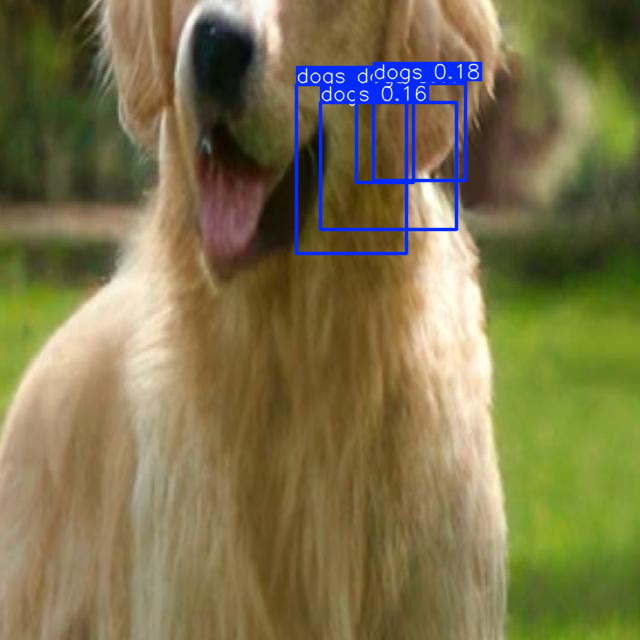

In [ ]:
import torchvision.transforms as T
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.9
# Читаем картинку
img = T.ToPILImage()(read_image('/content/yolov5/golden-2/test/images/SCR-20240402-nkut_jpeg.rf.caa3f1258daccf7195b63dbb4cdce864.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()